In [ ]:
#Vegdata

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [3]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
x_train=train_datagen.flow_from_directory(r"C:\Users\Welcome\Desktop\IBM\Data_Collection\Veg-Dataset\train",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 11386 images belonging to 9 classes.


In [5]:
x_test=test_datagen.flow_from_directory(r"C:\Users\Welcome\Desktop\IBM\Data_Collection\Veg-Dataset\test",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 3416 images belonging to 9 classes.


In [6]:
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [8]:
model=Sequential()

In [9]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Flatten())

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [14]:
model.add(Dense(9,activation='softmax'))

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
len(x_train)

475

In [17]:
1238/24

51.583333333333336

In [18]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
475/475 [==============================] - 370s 777ms/step - loss: 1.3620 - accuracy: 0.5928 - val_loss: 0.8496 - val_accuracy: 0.7155
Epoch 2/10
475/475 [==============================] - 480s 1s/step - loss: 0.5790 - accuracy: 0.7971 - val_loss: 0.7133 - val_accuracy: 0.7494
Epoch 3/10
475/475 [==============================] - 342s 719ms/step - loss: 0.4392 - accuracy: 0.8451 - val_loss: 0.3243 - val_accuracy: 0.8891
Epoch 4/10
475/475 [==============================] - 213s 449ms/step - loss: 0.3840 - accuracy: 0.8624 - val_loss: 0.5794 - val_accuracy: 0.8141
Epoch 5/10
475/475 [==============================] - 213s 449ms/step - loss: 0.3179 - accuracy: 0.8895 - val_loss: 0.3979 - val_accuracy: 0.8595
Epoch 6/10
475/475 [==============================] - 212s 447ms/step - loss: 0.2969 - accuracy: 0.8975 - val_loss: 0.3466 - val_accuracy: 0.8724
Epoch 7/10
475/475 [==============================] - 214s 450ms/step - loss: 0.2589 - accuracy: 0.9079 - val_loss: 0.3652 - va

In [19]:
model.save('vegetabledata.h5')

In [20]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('vegetabledata.h5')

In [24]:
img=image.load_img(r"C:\Users\Welcome\Desktop\IBM\Data_Collection\Veg-Dataset\test\Potato___Early_blight\fbc7567e-ce08-4ad0-b8fe-ffd98296ce02___RS_Early.B 8607.jpg")

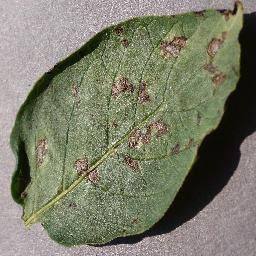

In [25]:
img

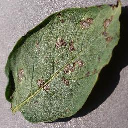

In [26]:
img=image.load_img(r"C:\Users\Welcome\Desktop\IBM\Data_Collection\Veg-Dataset\test\Potato___Early_blight\fbc7567e-ce08-4ad0-b8fe-ffd98296ce02___RS_Early.B 8607.jpg",target_size=(128,128))
img

In [27]:
x=image.img_to_array(img)
x

array([[[190., 184., 186.],
        [198., 192., 194.],
        [188., 182., 184.],
        ...,
        [139., 138., 133.],
        [134., 130., 129.],
        [147., 141., 145.]],

       [[196., 190., 192.],
        [187., 181., 183.],
        [192., 186., 188.],
        ...,
        [152., 147., 143.],
        [148., 139., 140.],
        [141., 132., 137.]],

       [[188., 182., 184.],
        [194., 188., 190.],
        [194., 188., 190.],
        ...,
        [144., 136., 134.],
        [153., 142., 146.],
        [164., 151., 160.]],

       ...,

       [[188., 177., 181.],
        [186., 175., 179.],
        [189., 178., 182.],
        ...,
        [140., 130., 131.],
        [147., 137., 138.],
        [139., 129., 130.]],

       [[182., 171., 175.],
        [192., 181., 185.],
        [190., 179., 183.],
        ...,
        [153., 143., 144.],
        [148., 138., 139.],
        [136., 126., 127.]],

       [[200., 189., 193.],
        [183., 172., 176.],
        [184., 1

In [28]:
x=np.expand_dims(x,axis=0)
x

array([[[[190., 184., 186.],
         [198., 192., 194.],
         [188., 182., 184.],
         ...,
         [139., 138., 133.],
         [134., 130., 129.],
         [147., 141., 145.]],

        [[196., 190., 192.],
         [187., 181., 183.],
         [192., 186., 188.],
         ...,
         [152., 147., 143.],
         [148., 139., 140.],
         [141., 132., 137.]],

        [[188., 182., 184.],
         [194., 188., 190.],
         [194., 188., 190.],
         ...,
         [144., 136., 134.],
         [153., 142., 146.],
         [164., 151., 160.]],

        ...,

        [[188., 177., 181.],
         [186., 175., 179.],
         [189., 178., 182.],
         ...,
         [140., 130., 131.],
         [147., 137., 138.],
         [139., 129., 130.]],

        [[182., 171., 175.],
         [192., 181., 185.],
         [190., 179., 183.],
         ...,
         [153., 143., 144.],
         [148., 138., 139.],
         [136., 126., 127.]],

        [[200., 189., 193.],
       

In [29]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 227ms/step


In [31]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [32]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']

In [33]:
index[y[0]]

'Tomato___Septoria_leaf_spot'

In [35]:
img=image.load_img(r"C:\Users\Welcome\Desktop\IBM\Data_Collection\Veg-Dataset\test\Potato___Early_blight\fbc7567e-ce08-4ad0-b8fe-ffd98296ce02___RS_Early.B 8607.jpg",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

1/1 [==============================] - 0s 41ms/step


'Tomato___Septoria_leaf_spot'